In [16]:
import xarray as xr
import tobac
import CCores.cores as cores
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [4]:
idate = '20200906'
time = 0
#tag = 'MFG'
tag = 'MSG'
testfile = '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet/'+idate[0:4]+'/'+idate[4:6]+'/'+idate[6:8]+'/IR_wavelet_BT_'+idate+'_*.nc'
origfile = '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet_old/'+idate[0:4]+'/'+idate[4:6]+'/'+idate[6:8]+'/IR_wavelet_BT_'+idate+'_*.nc'

In [5]:
data = xr.open_mfdataset(testfile)#.sel(lat=slice(6,8), lon=slice(6,9.5))'/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_wavelet/2020/06/25/IR_wavelet_BT_20200625_1300.nc'

In [6]:
nflics = xr.open_mfdataset(origfile)

In [20]:
data

<xarray.Dataset>
Dimensions:  (lat: 566, lon: 667, time: 95)
Coordinates:
  * time     (time) datetime64[ns] 2020-09-06 ... 2020-09-06T23:45:00
  * lat      (lat) float64 4.0 4.027 4.054 4.081 ... 18.89 18.92 18.95 18.97
  * lon      (lon) float64 -19.0 -18.97 -18.95 -18.92 ... -1.106 -1.079 -1.052
Data variables:
    power    (time, lat, lon) float64 dask.array<chunksize=(1, 566, 667), meta=np.ndarray>
    BT       (time, lat, lon) int16 dask.array<chunksize=(1, 566, 667), meta=np.ndarray>
Attributes:
    radii:              [ 2  3  4  6 10 16 24]
    scales_rounded:     [ 12  18  28  42  63  96 146]
    scales_original:    [ 12.          18.1885988   27.56876052  41.78642704 ...
    cutout_T:           -40
    cutout_minPixelNb:  78.53981633974483

In [12]:
tstep_old = nflics.isel(time=time).load() #-24

In [27]:
tstep_old

<xarray.Dataset>
Dimensions:  (lat: 339, lon: 400)
Coordinates:
    time     datetime64[ns] 2020-09-06
  * lat      (lat) float64 4.0 4.045 4.09 4.135 4.18 ... 18.8 18.84 18.89 18.93
  * lon      (lon) float64 -19.0 -18.96 -18.91 -18.87 ... -1.168 -1.124 -1.079
Data variables:
    power    (lat, lon) int16 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    BT       (lat, lon) int16 1882 1753 2006 1824 1956 ... 1516 1600 1811 1986
Attributes:
    radii:              [2 3 5]
    scales_rounded:     [25 35 50]
    scales_original:    [25.         35.35533906 50.        ]
    cutout_T:           -40
    cutout_minPixelNb:  78.53981633974483

In [67]:
old = data['BT']/100+273.15
olr = old.to_iris()

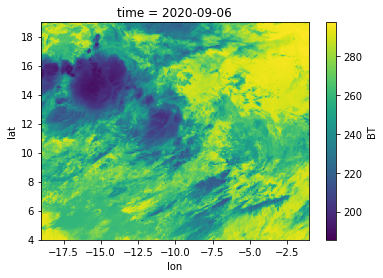

In [68]:
old.isel(time=0).plot()

In [69]:
# Determine temporal and spatial sampling of the input data:
dxy,dt=tobac.get_spacings(olr,grid_spacing=3000)

In [70]:


# Keyword arguments for the feature detection step
parameters_features={}
parameters_features['position_threshold']='weighted_diff'
parameters_features['sigma_threshold']=0.5
parameters_features['min_num']=4
parameters_features['target']='minimum'
parameters_features['threshold']=[250,225,200,175,150]



In [71]:


# Feature detection and save results to file:
print('starting feature detection')
Features=tobac.feature_detection_multithreshold(olr,dxy,**parameters_features)

starting feature detection


In [72]:


# Keyword arguments for the segmentation step:
parameters_segmentation={}
parameters_segmentation['target']='minimum'
parameters_segmentation['method']='watershed'
parameters_segmentation['threshold']=250



In [73]:
Features

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,lat,lon
0,0,2,3.030869,400.349983,5,250,1,2020-09-06 00:00:00,2020-09-06 00:00:00,4.082024,-8.210785
1,0,3,49.897403,253.328164,28,250,2,2020-09-06 00:00:00,2020-09-06 00:00:00,5.349175,-12.172943
2,0,4,51.876197,318.422727,3,250,3,2020-09-06 00:00:00,2020-09-06 00:00:00,5.402623,-10.418680
3,0,5,62.342193,654.811447,166,250,4,2020-09-06 00:00:00,2020-09-06 00:00:00,5.685231,-1.353186
4,0,6,55.939431,635.937336,17,250,5,2020-09-06 00:00:00,2020-09-06 00:00:00,5.512357,-1.861833
...,...,...,...,...,...,...,...,...,...,...,...
23031,94,312,498.195915,547.781782,330,225,23032,2020-09-06 23:45:00,2020-09-06 23:45:00,17.249719,-4.237578
23032,94,314,234.000000,456.000000,1,200,23033,2020-09-06 23:45:00,2020-09-06 23:45:00,10.295372,-6.711047
23033,94,315,334.000000,430.000000,1,200,23034,2020-09-06 23:45:00,2020-09-06 23:45:00,12.951858,-7.411733
23034,94,316,482.012175,3.053308,133,200,23035,2020-09-06 23:45:00,2020-09-06 23:45:00,16.830155,-18.917715


In [74]:
# Perform segmentation and save results to files:
Mask_OLR,Features_OLR=tobac.segmentation_2D(Features,olr,dxy,**parameters_segmentation)

In [76]:


# keyword arguments for linking step
parameters_linking={}
parameters_linking['v_max']=20
parameters_linking['stubs']=2
parameters_linking['order']=1
parameters_linking['extrapolate']=1
parameters_linking['memory']=0
parameters_linking['adaptive_stop']=0.2
parameters_linking['adaptive_step']=0.95
parameters_linking['subnetwork_size']=100
parameters_linking['method_linking']= 'predict'


Track=tobac.linking_trackpy(Features,olr,dt=dt,dxy=dxy,**parameters_linking)

Frame 94: 295 trajectories present.


In [82]:
trac = Track[Track['frame']==0]

In [83]:
trac

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,lat,lon,cell,time_cell
0,0,2,3.030869,400.349983,5,250,1,2020-09-06 00:00:00,2020-09-06 00:00:00,4.082024,-8.210785,NaN,NaT
1,0,3,49.897403,253.328164,28,250,2,2020-09-06 00:00:00,2020-09-06 00:00:00,5.349175,-12.172943,2,0 days
2,0,4,51.876197,318.422727,3,250,3,2020-09-06 00:00:00,2020-09-06 00:00:00,5.402623,-10.418680,3,0 days
3,0,5,62.342193,654.811447,166,250,4,2020-09-06 00:00:00,2020-09-06 00:00:00,5.685231,-1.353186,NaN,NaT
4,0,6,55.939431,635.937336,17,250,5,2020-09-06 00:00:00,2020-09-06 00:00:00,5.512357,-1.861833,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,288,438.573133,70.905602,536,200,275,2020-09-06 00:00:00,2020-09-06 00:00:00,15.699390,-17.089132,275,0 days
275,0,289,449.000000,163.000000,1,200,276,2020-09-06 00:00:00,2020-09-06 00:00:00,15.971411,-14.607238,NaN,NaT
276,0,290,466.358858,123.772590,24,200,277,2020-09-06 00:00:00,2020-09-06 00:00:00,16.423444,-15.664396,NaN,NaT
277,0,291,488.972928,119.014465,5,200,278,2020-09-06 00:00:00,2020-09-06 00:00:00,17.010729,-15.792625,278,0 days


In [80]:
def make_map(axes):
    import matplotlib.ticker as mticker
    import cartopy.crs as ccrs
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

    gl = axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='-')
    axes.coastlines('10m')

    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlocator = mticker.MaxNLocator(nbins=5,min_n_ticks=3,steps=None)
    gl.ylocator = mticker.MaxNLocator(nbins=5,min_n_ticks=3,steps=None)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #gl.xlabel_style = {'size': 15, 'color': 'gray'}
    #gl.xlabel_style = {'color': 'red', 'weight': 'bold'}
    return axes

/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/home/ck/miniconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


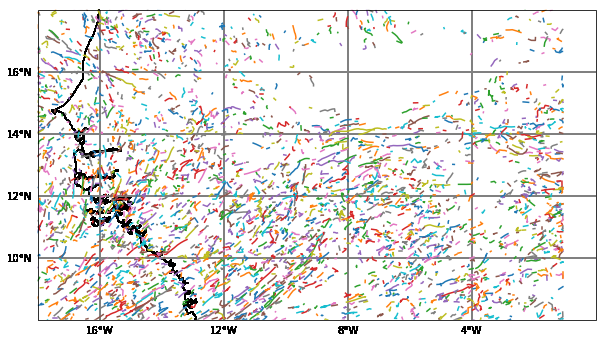

In [81]:
# Set extent of maps created in the following cells:
axis_extent=[-18,0,8,18]

def map_tracks(track,axis_extent=None,figsize=(10,10),axes=None):
    for cell in track['cell'].dropna().unique():
        track_i=track[track['cell']==cell]
        axes.plot(track_i['lon'],track_i['lat'],'-')
        if axis_extent:
            axes.set_extent(axis_extent)
        axes=make_map(axes)
    return axes


# Plot map with all individual tracks:
import cartopy.crs as ccrs
fig_map,ax_map=plt.subplots(figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax_map=map_tracks(Track,axis_extent=axis_extent,axes=ax_map)



In [9]:
tstep = data.isel(time=time).load()

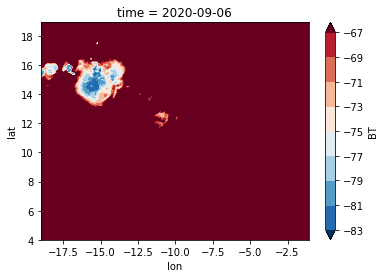

In [17]:
(tstep_old['BT']/100).plot.contourf(levels=np.arange(-83,-65,2))

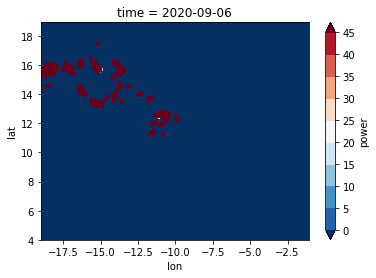

In [18]:
tstep_old['power'].plot.contourf(levels=np.arange(0,50,5))

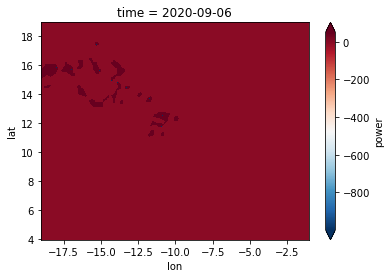

In [19]:
tstep_old['power'].plot.pcolormesh(vmin=-999, vmax=50, cmap='RdBu_r')

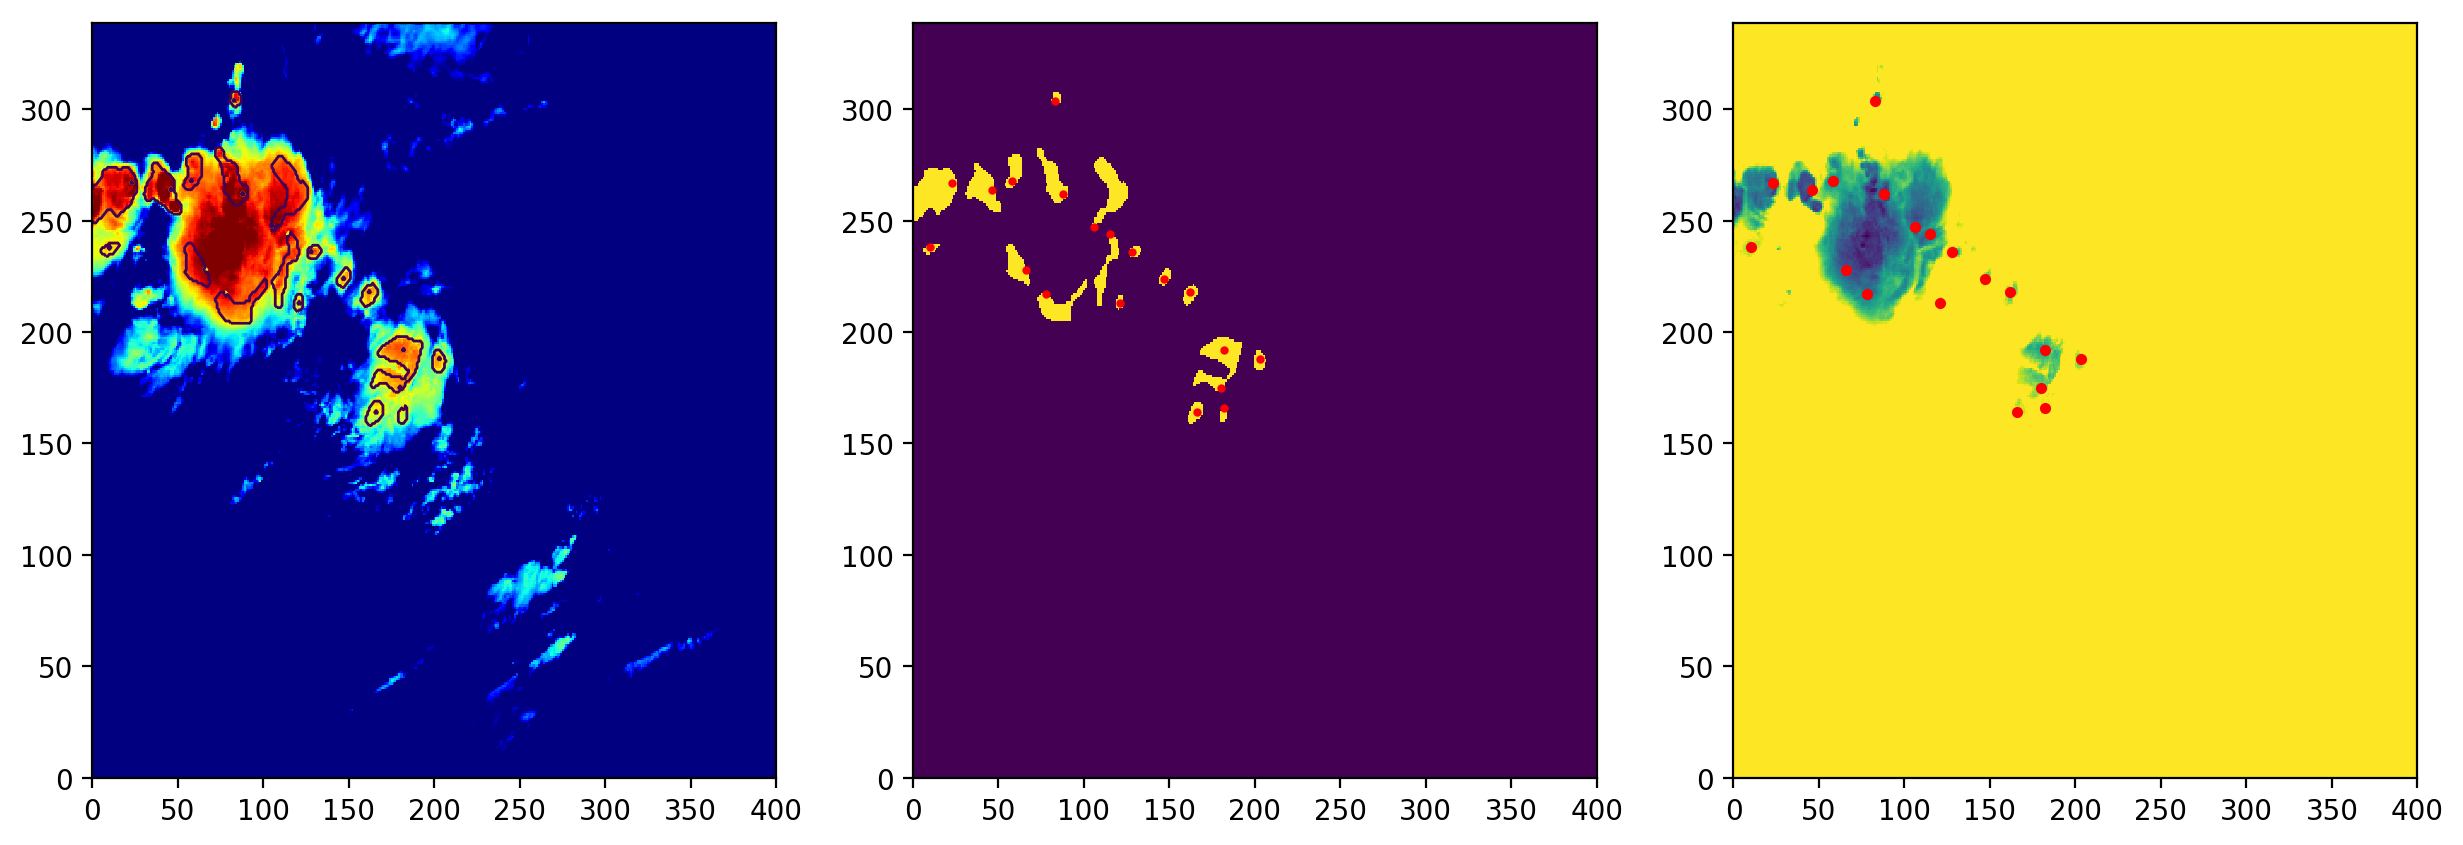

In [49]:
lon, lat = np.meshgrid(tstep_old['lon'], tstep_old['lat'])

f = plt.figure(figsize=(15,5), dpi=200)
f.add_subplot(131)
plt.pcolormesh(tstep_old['BT']/100, vmin=-80, vmax=-40, cmap='jet_r')
plt.contour(tstep_old['power'], levels=[-5,0], extend='both', linewidths=1, cmap='viridis_r')

npos = np.where(tstep_old['power']<-100)

f.add_subplot(132)
plt.pcolormesh(tstep_old['power'], vmin=0, vmax=50)
    
for y,x in zip(npos[0], npos[1]):
    

    plt.plot(x,y, color='red', markersize=2, marker='o')

    
f.add_subplot(133)
plt.pcolormesh(tstep_old['BT']/100, vmax=-65, vmin=-85)
for y,x in zip(npos[0], npos[1]):
    
    plt.plot(x,y, color='red', markersize=3, marker='o')
    

#f.savefig('/home/ck/DIR/cornkle/data/test/old_cores'+tag+'.png')


In [130]:
from utils import u_grid, u_interpolate as u_int
import glob

met_folder = '/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_data/2020/09/06/'

files = glob.glob(met_folder + 'IR_108_BT_20200906_0000.nc')

ds = xr.open_dataset(files[0], decode_times=False)


In [131]:
files

['/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/real_time_data/2020/09/06/IR_108_BT_20200906_0000.nc']

In [135]:
from saveCore_standalone_NFLICS import run_powerBlobs as oldNflics, powerBlob_utils, util 

#ds = ds.isel(time=time).load() #-24

data_resolution = 5 # in km
# make salem grid
grid = u_grid.make(np.arange(-19,0), np.arange(4,20), data_resolution*1000)
dlon = ds['lon_2d'].squeeze().values.T
dlat = ds['lat_2d'].squeeze().values.T
inds, weights, shape = u_int.interpolation_weights_grid(dlon, dlat, grid)

data = ds['IR108_BT'].squeeze().values.T
try:
    orig = u_int.interpolate_data(data, inds, weights, shape)
except IndexError:
    print('Interpolation problem, continue')
lonN, latN = grid.ll_coordinates

In [136]:
savefile = '/home/ck/DIR/cornkle/data/test/testblob.nc'
oldnflics = oldNflics.wavelet_analysis(outt, lonN, latN, date, savefile, data_resolution=5)

outmin -87.36 -50.02
Saved /home/ck/DIR/cornkle/data/test/testblob.nc


In [137]:
outt, nogood, t_thresh_size, t_thresh_cut, pix_nb, area_img = powerBlob_utils.filter_img(orig, data_resolution)

outmin -87.36108862240472 24.212036132812504


In [138]:
wav = util.waveletT(outt, dataset='METEOSAT5K_vera')

In [139]:
wav.keys()

dict_keys(['t', 'scales', 'res', 'coeffs'])

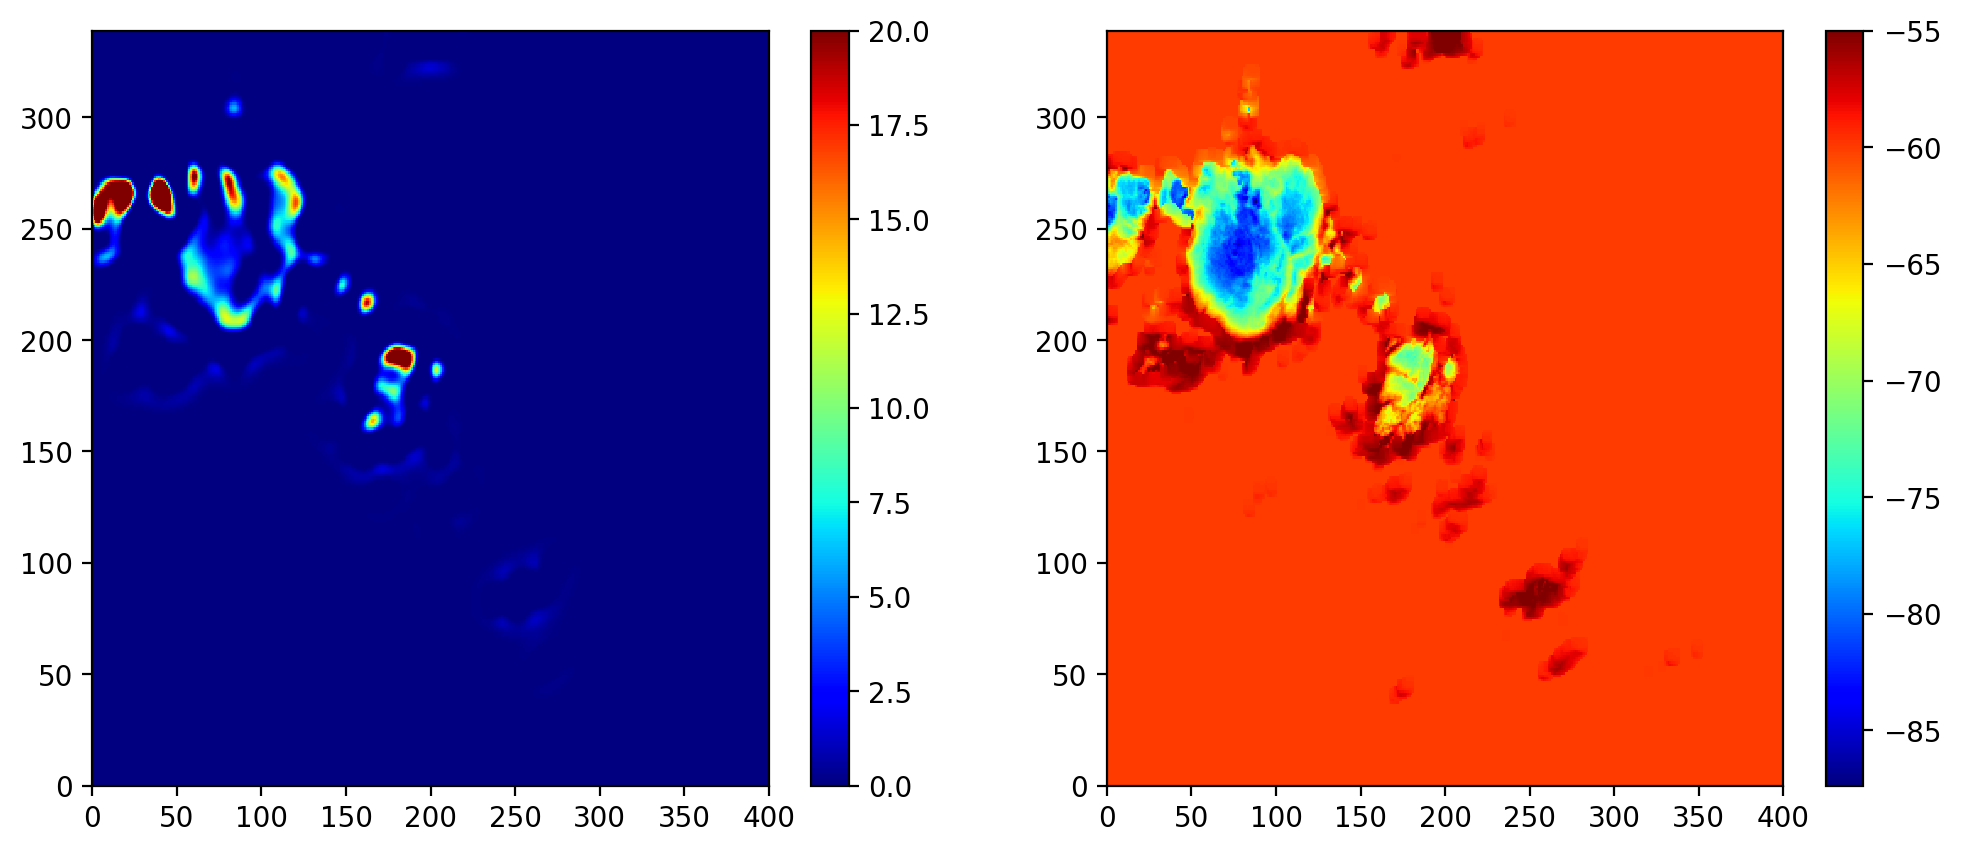

In [140]:
f = plt.figure(figsize=(12,5), dpi=200)
ax = f.add_subplot(121)
plt.pcolormesh(wav['t'][2,:,:], vmax=20, cmap='jet')
plt.colorbar()
ax = f.add_subplot(122)
plt.pcolormesh(outt, vmax=-55, cmap='jet')
plt.colorbar()

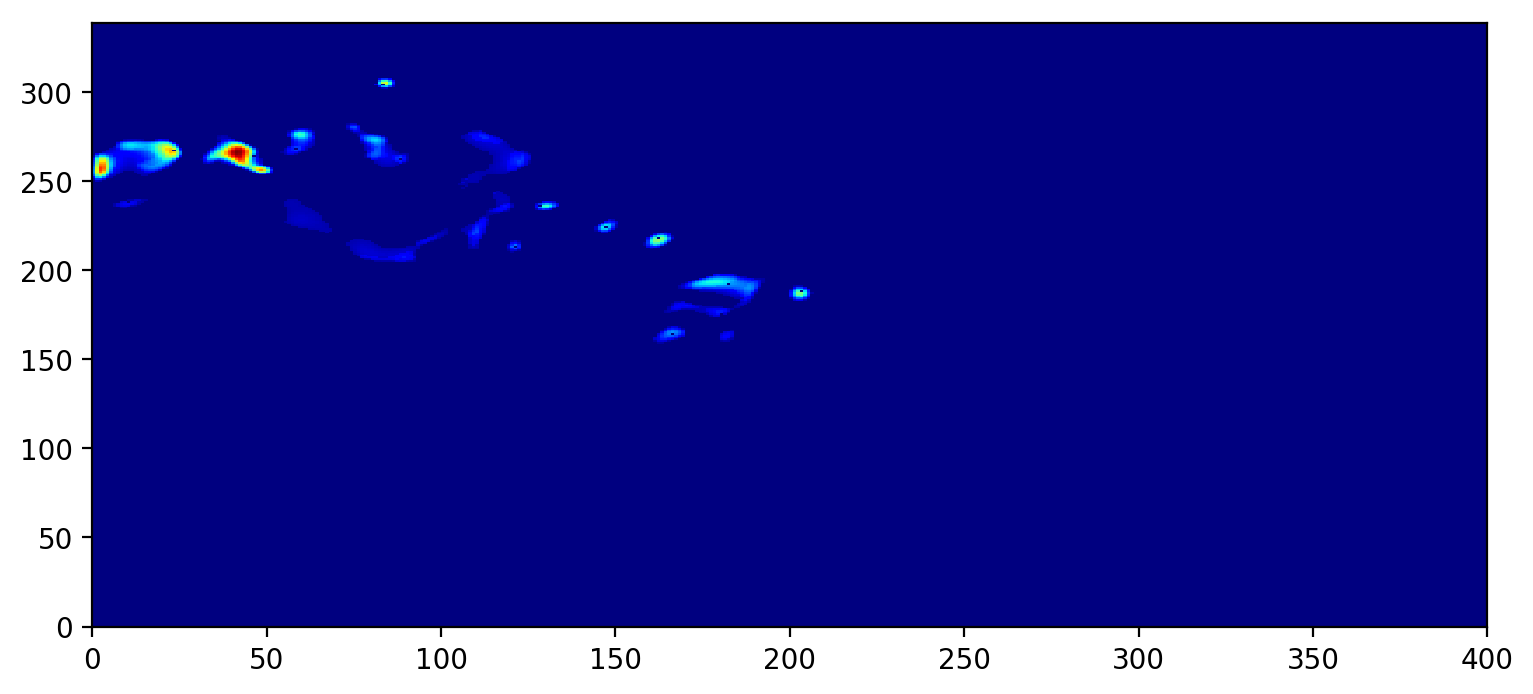

In [56]:
plt.figure(figsize=(9,4), dpi=200)
plt.pcolormesh(tstep_old['power'], vmin=0, cmap='jet')

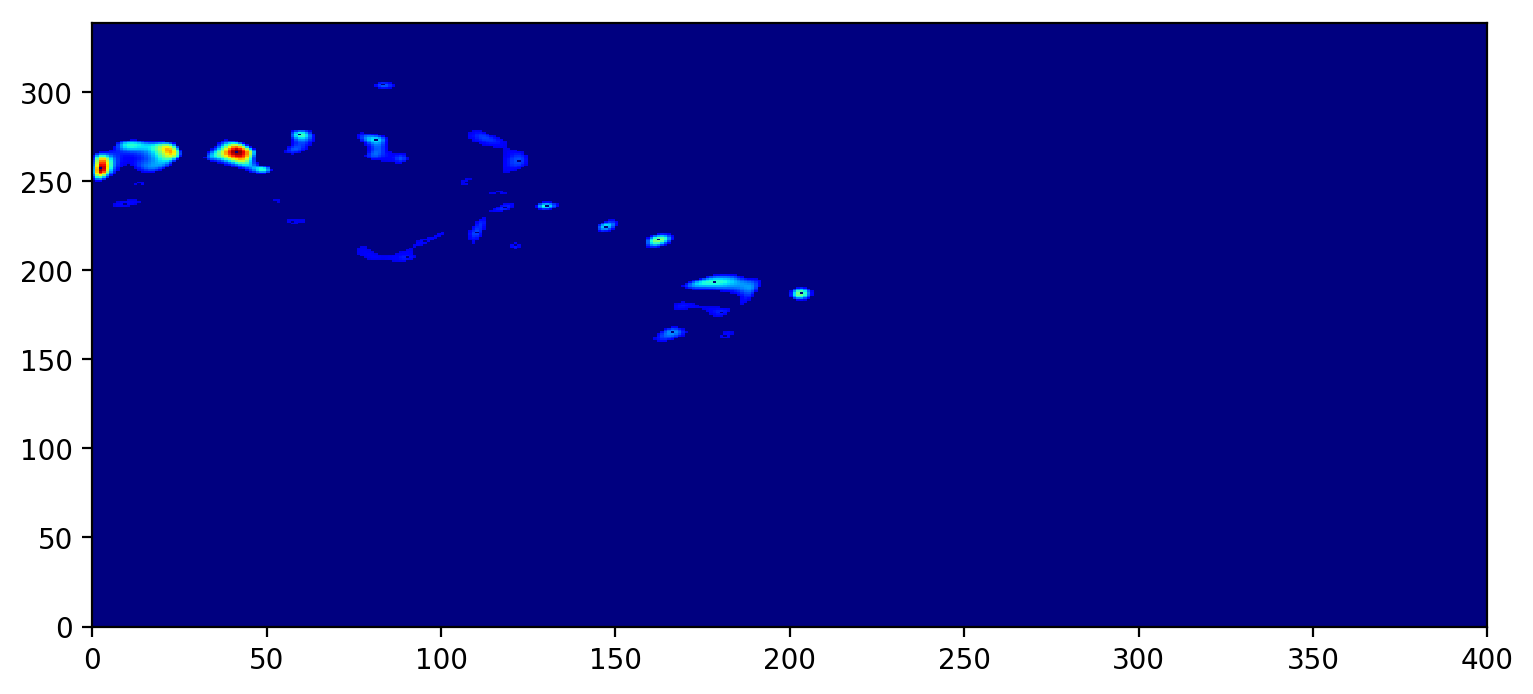

In [57]:
plt.figure(figsize=(9,4), dpi=200)
plt.pcolormesh(oldnflics['blobs'], vmin=0, cmap='jet')

In [141]:
wObj = cores.dataset('METEOSAT5K_vera')

Initialised wavelet with scales:  [25.         35.35533906 50.        ]


In [142]:
vars(wObj)

{'name': 'METEOSAT5K_vera',
 'res': 5,
 'dist': 0.5,
 'nb': 2,
 'start': 25,
 'Tcut': -40,
 'Twav': -50,
 'scales': array([25.        , 35.35533906, 50.        ])}

In [146]:
wObj.read_img(orig, lonN, latN, edge_smoothing=True)

outmin -87.36108862240472 24.212036132812504


In [147]:
wObj.applyWavelet()

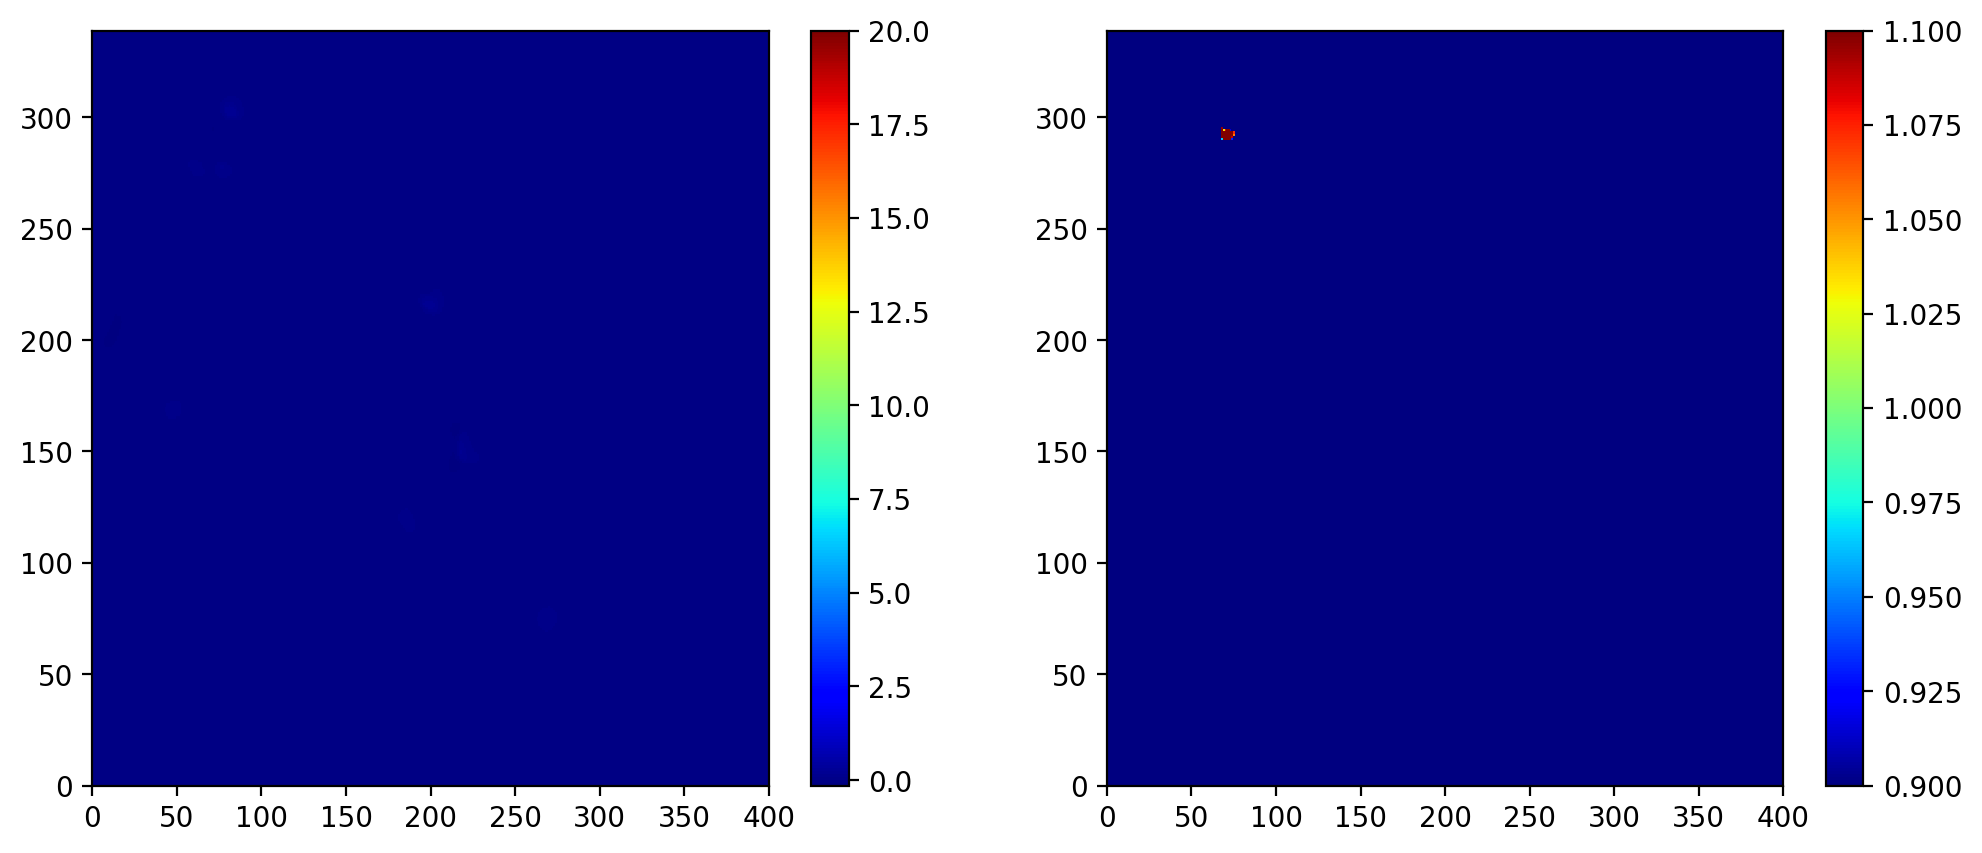

In [149]:
f = plt.figure(figsize=(12,5), dpi=200)
ax = f.add_subplot(121)
plt.pcolormesh(wObj.power[2,:,:]-wav['t'][2,:,:], vmax=20, cmap='jet')
plt.colorbar()
ax = f.add_subplot(122)
plt.pcolormesh(wObj.image-outt, cmap='jet', vmin=1, vmax=1)
plt.colorbar()

In [107]:
wObj.powerWeighting()

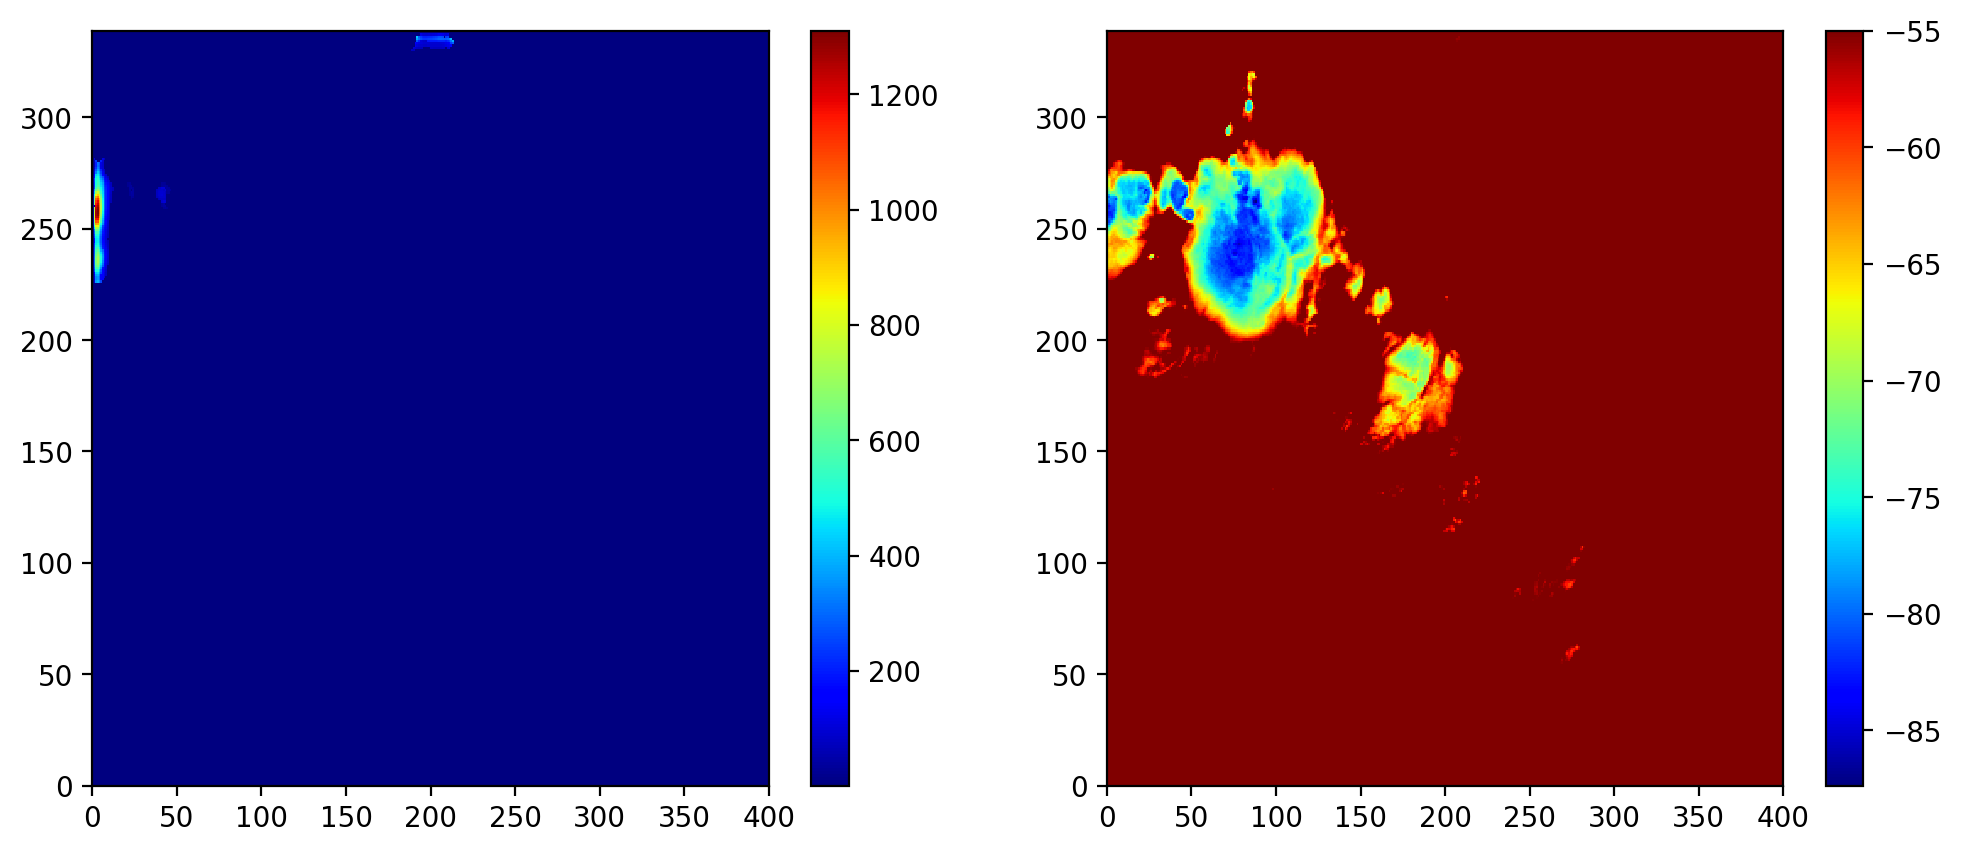

In [110]:
f = plt.figure(figsize=(12,5), dpi=200)
ax = f.add_subplot(121)
plt.pcolormesh(wObj.power_weighted, vmin=1, cmap='jet')
plt.colorbar()
ax = f.add_subplot(122)
plt.pcolormesh(wObj.original, vmax=-55, cmap='jet')
plt.colorbar()

In [ ]:
f = plt.figure(figsize=(12,5), dpi=200)
ax = f.add_subplot(121)
plt.pcolormesh(wObj.power[2,:,:], vmax=20, cmap='jet')
plt.colorbar()
ax = f.add_subplot(122)
plt.pcolormesh(wObj.original, vmax=-55, cmap='jet')
plt.colorbar()

In [303]:
#nflics = nflics.sel(lon=slice(-18,-8), lat=slice(10,19))
nflics = nflics.sel(lon=slice(-18,0), lat=slice(4,12.5))#.sel(lon=slice(-18,0), lat=slice(4,12.5))

In [304]:
tstep_old = tstep_old.sel(lon=slice(-18,0), lat=slice(4,12.5))#.sel(lon=slice(-18,0), lat=slice(4,12.5))

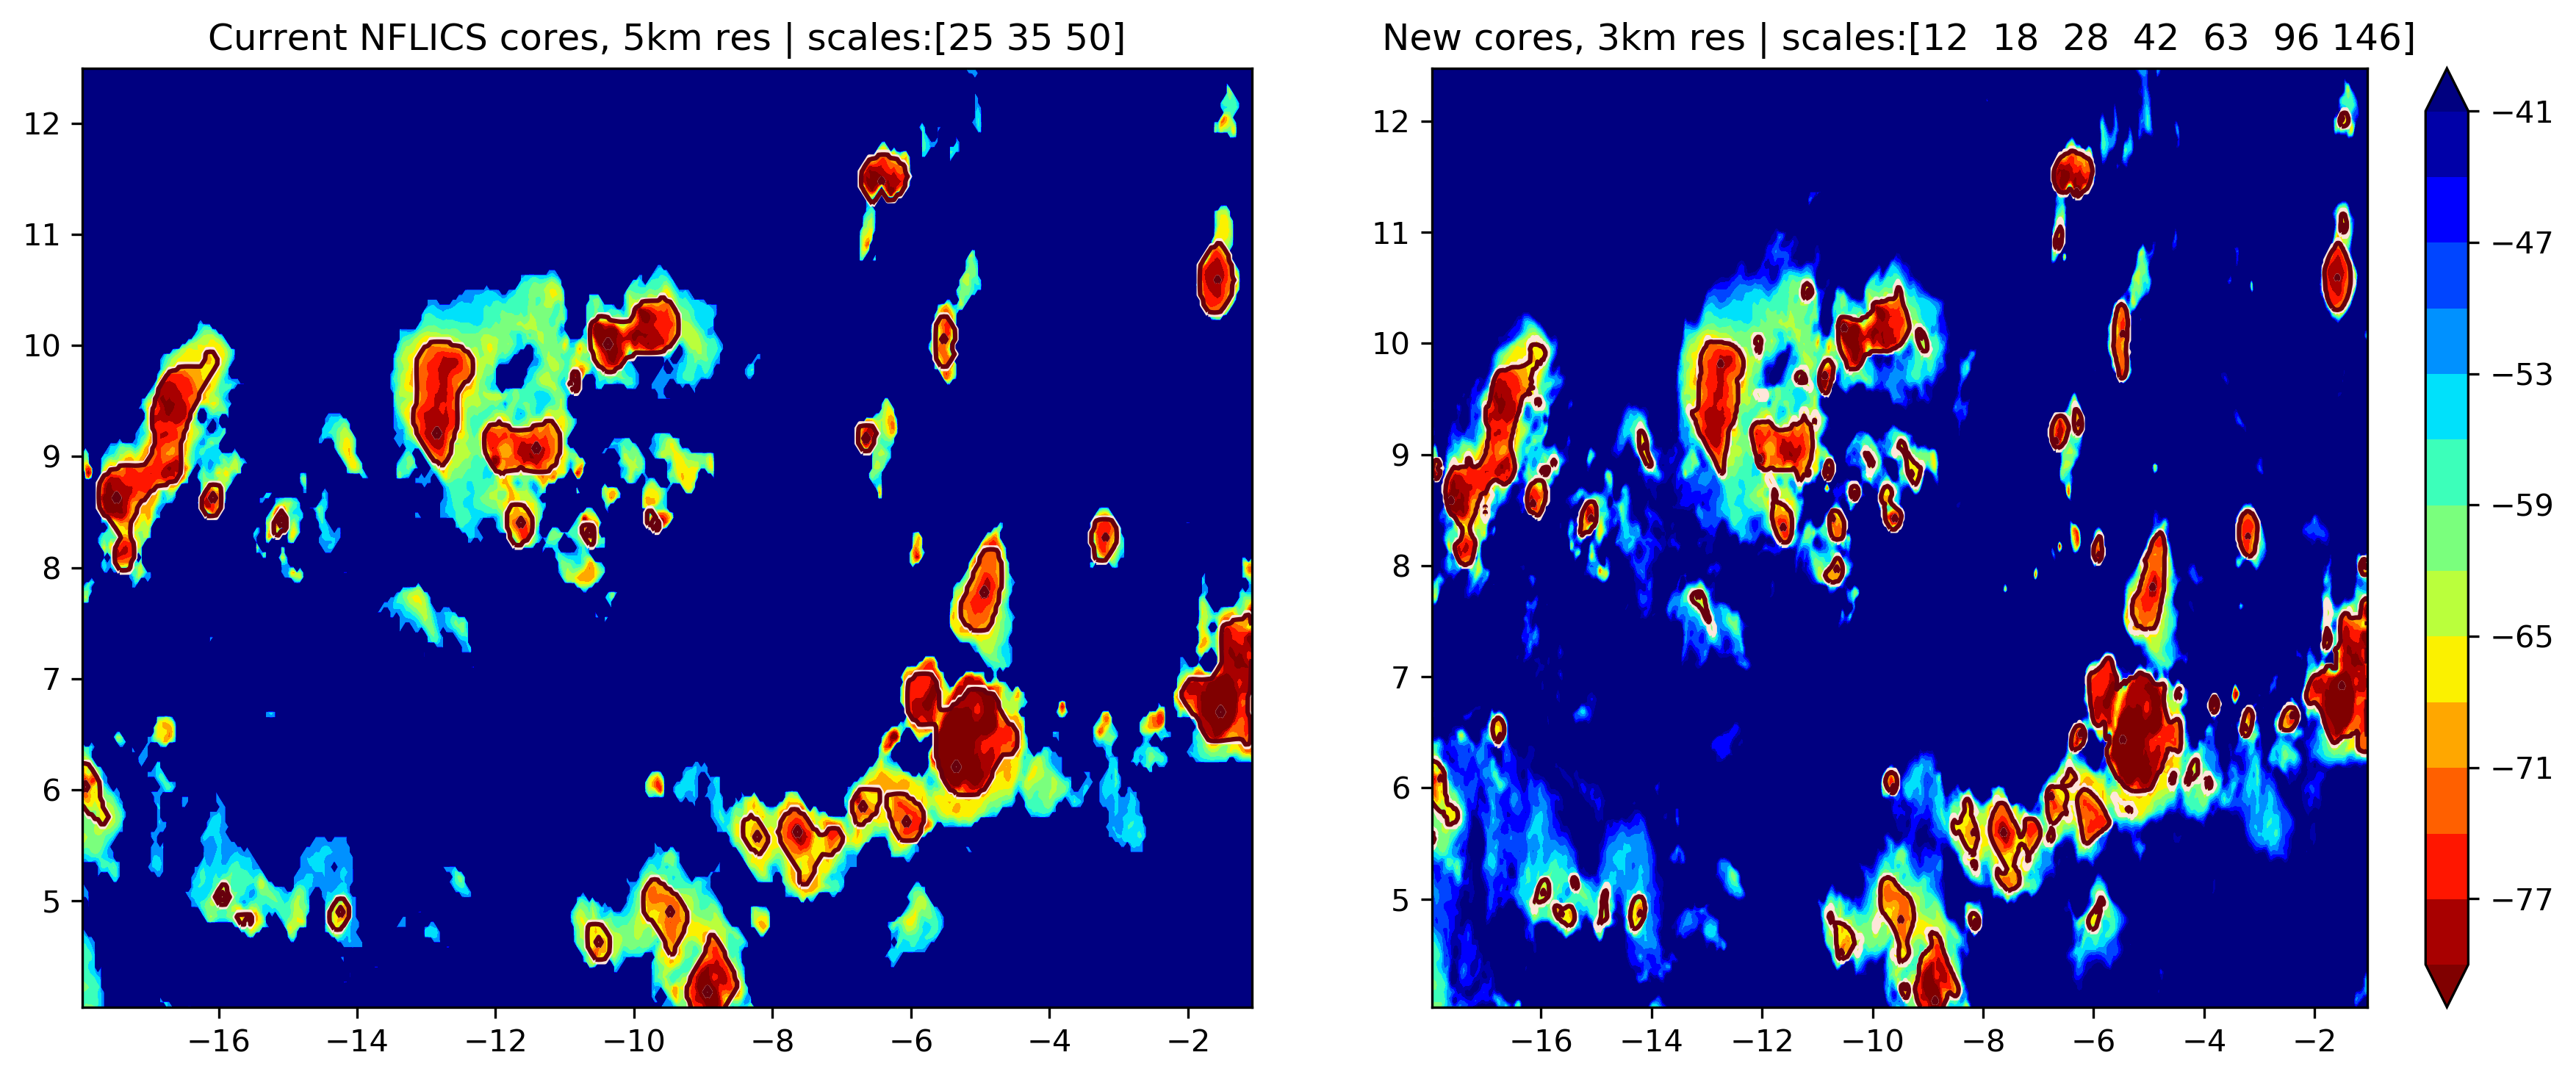

In [314]:
f = plt.figure(figsize=(12,5), dpi=300)
ax = f.add_subplot(121)
plt.contourf(nflics['lon'],nflics['lat'],nflics['tir']/100, levels=np.arange(-80,-40,3), extend='both', cmap='jet_r')
plt.contour(nflics['lon'],nflics['lat'], nflics['blobs'], cmap='Reds', levels=[-1, 0, 10])
plt.title('Current NFLICS cores, 5km res | scales:[25 35 50]')

ax = f.add_subplot(122)
plt.contourf(tstep_old['lon'],tstep_old['lat'],tstep_old['BT']/100, levels=np.arange(-80,-40,3), extend='both', cmap='jet_r')
plt.colorbar()
plt.contour(tstep_old['lon'],tstep_old['lat'], tstep_old['power'], cmap='Reds', levels=[-1, 0, 10])
plt.title('New cores, 3km res | scales:[12  18  28  42  63  96 146]')
plt.tight_layout()
#f.savefig('/home/ck/DIR/cornkle/data/test/nflics_20090530.jpg')

In [310]:
prcp = xr.open_dataset('/media/ck/Elements/Africa/WestAfrica/NFLICS/MCS_TIR/GPM_granules/3B-HHR.MS.MRG.3IMERG.20200530-S180000-E182959.1080.V06B.HDF5', group='/Grid/')
prcp = prcp['precipitationCal'].squeeze()
pbox = prcp.sel(lat=slice(np.min(latitudes), np.max(latitudes)), lon=slice(np.min(longitudes),np.max(longitudes)))
pbox = pbox.sel(lon=slice(-18,0), lat=slice(4,12.5))
#plt.contourf(pbox.lon, pbox.lat,pbox.T, cmap='viridis', levels=[2,5,10,20,30])

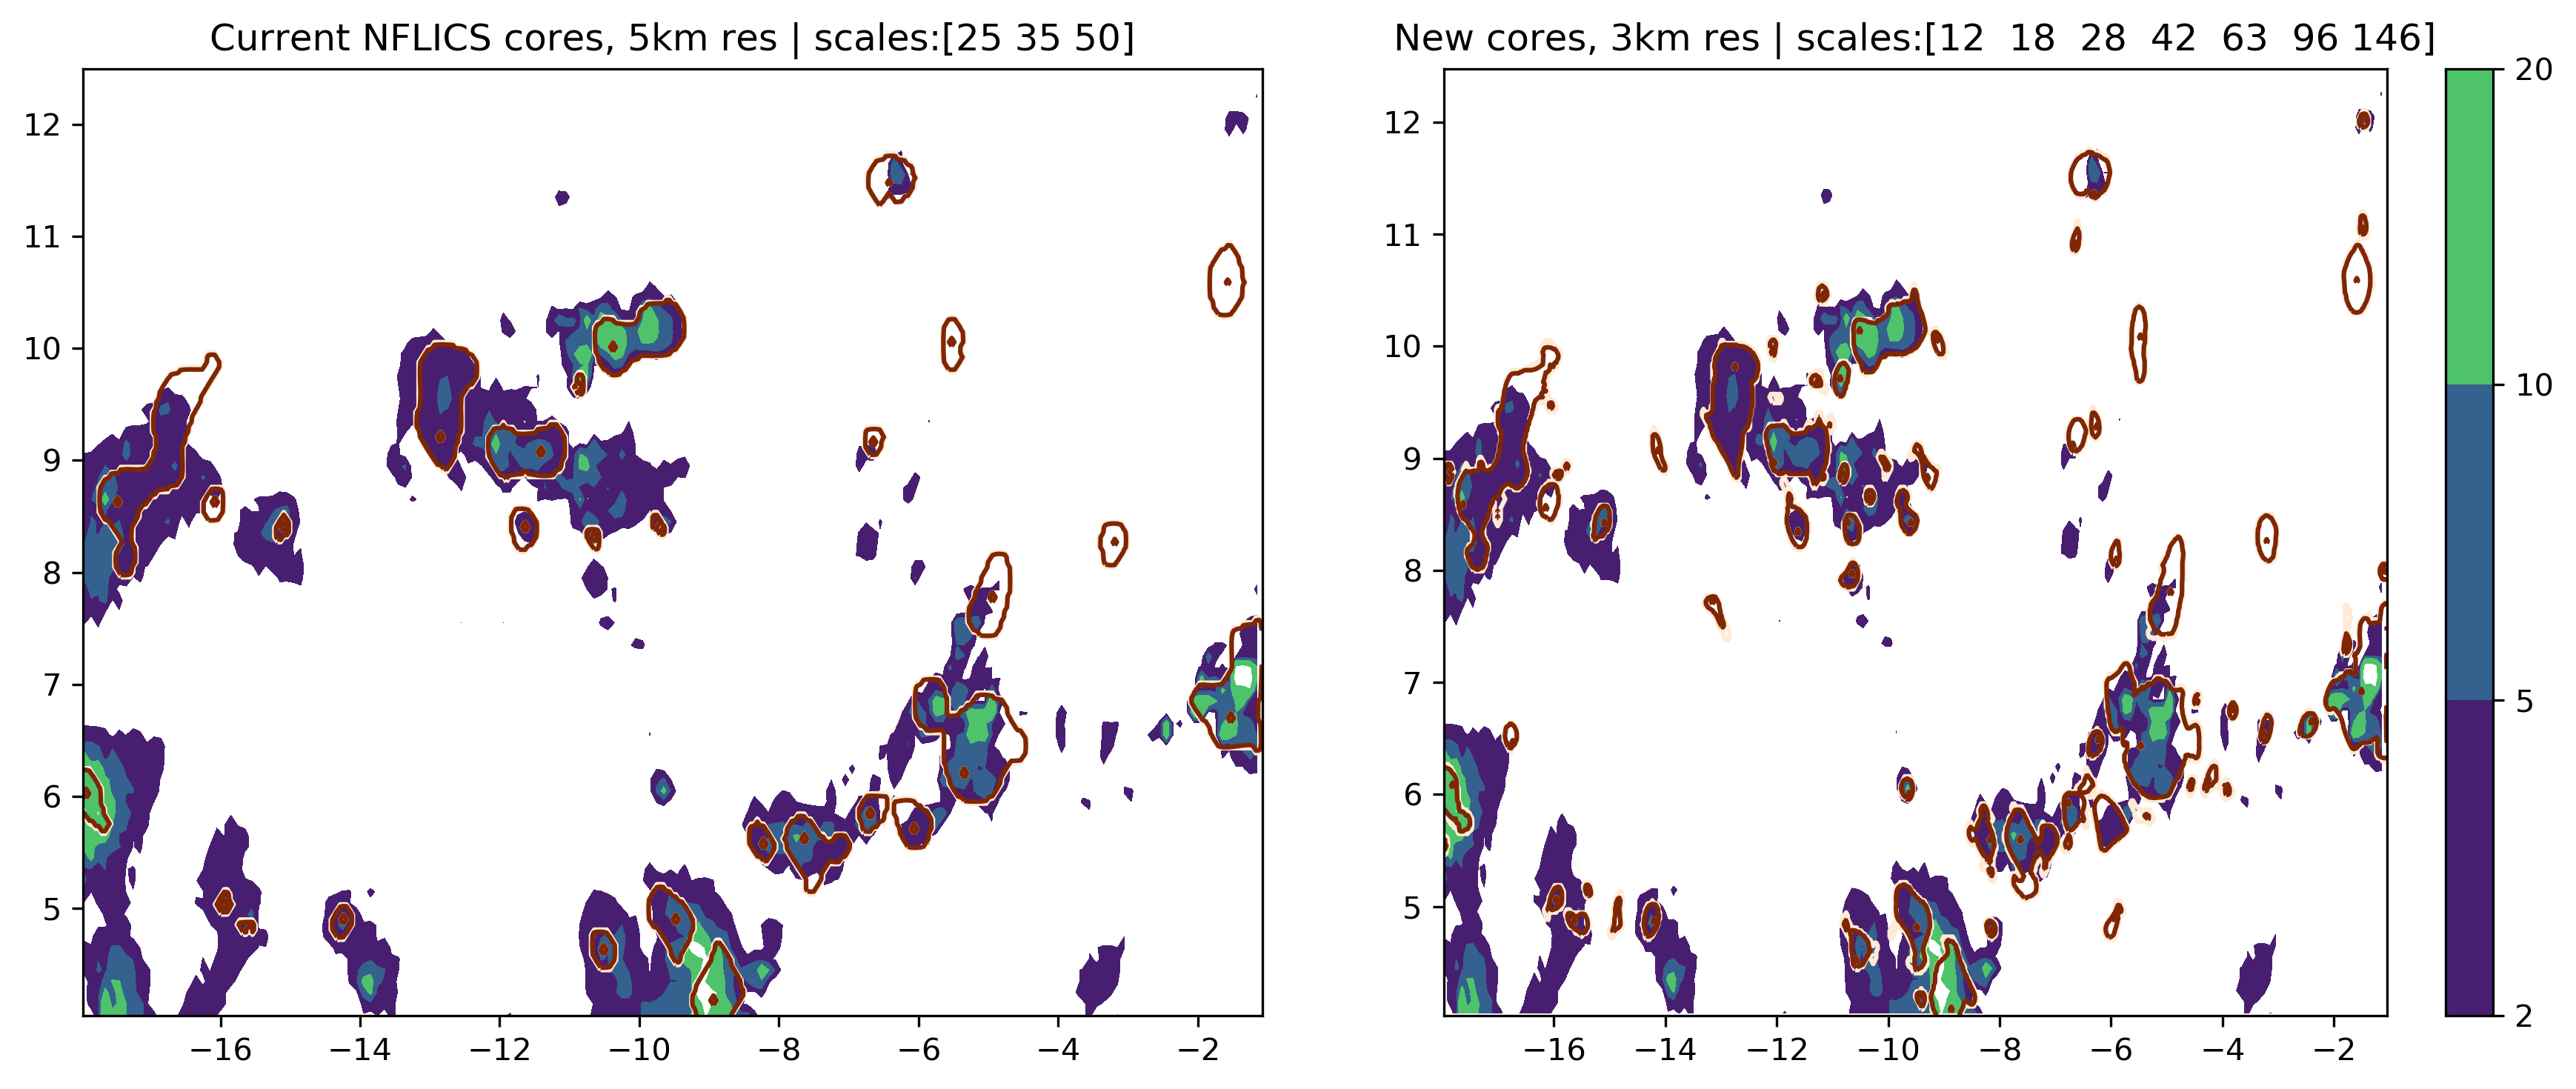

In [313]:
f = plt.figure(figsize=(12,5), dpi=300)
ax = f.add_subplot(121)
plt.contourf(pbox.lon, pbox.lat,pbox.T, cmap='viridis', levels=[2,5,10,20])
plt.contour(nflics['lon'],nflics['lat'], nflics['blobs'], cmap='Oranges', levels=[-1, 0, 10])
plt.title('Current NFLICS cores, 5km res | scales:[25 35 50]')

ax = f.add_subplot(122)
plt.contourf(pbox.lon, pbox.lat,pbox.T, cmap='viridis', levels=[2,5,10,20])
plt.colorbar()
plt.contour(tstep_old['lon'],tstep_old['lat'], tstep_old['power'], cmap='Oranges', levels=[-1, 0, 10])
plt.title('New cores, 3km res | scales:[12  18  28  42  63  96 146]')
plt.tight_layout()
#f.savefig('/home/ck/DIR/cornkle/data/test/nflics_200530_1800.jpg')

Text(0.5,1,'New cores, 3km res | scales:[12  18  28  42  63  96 146]')

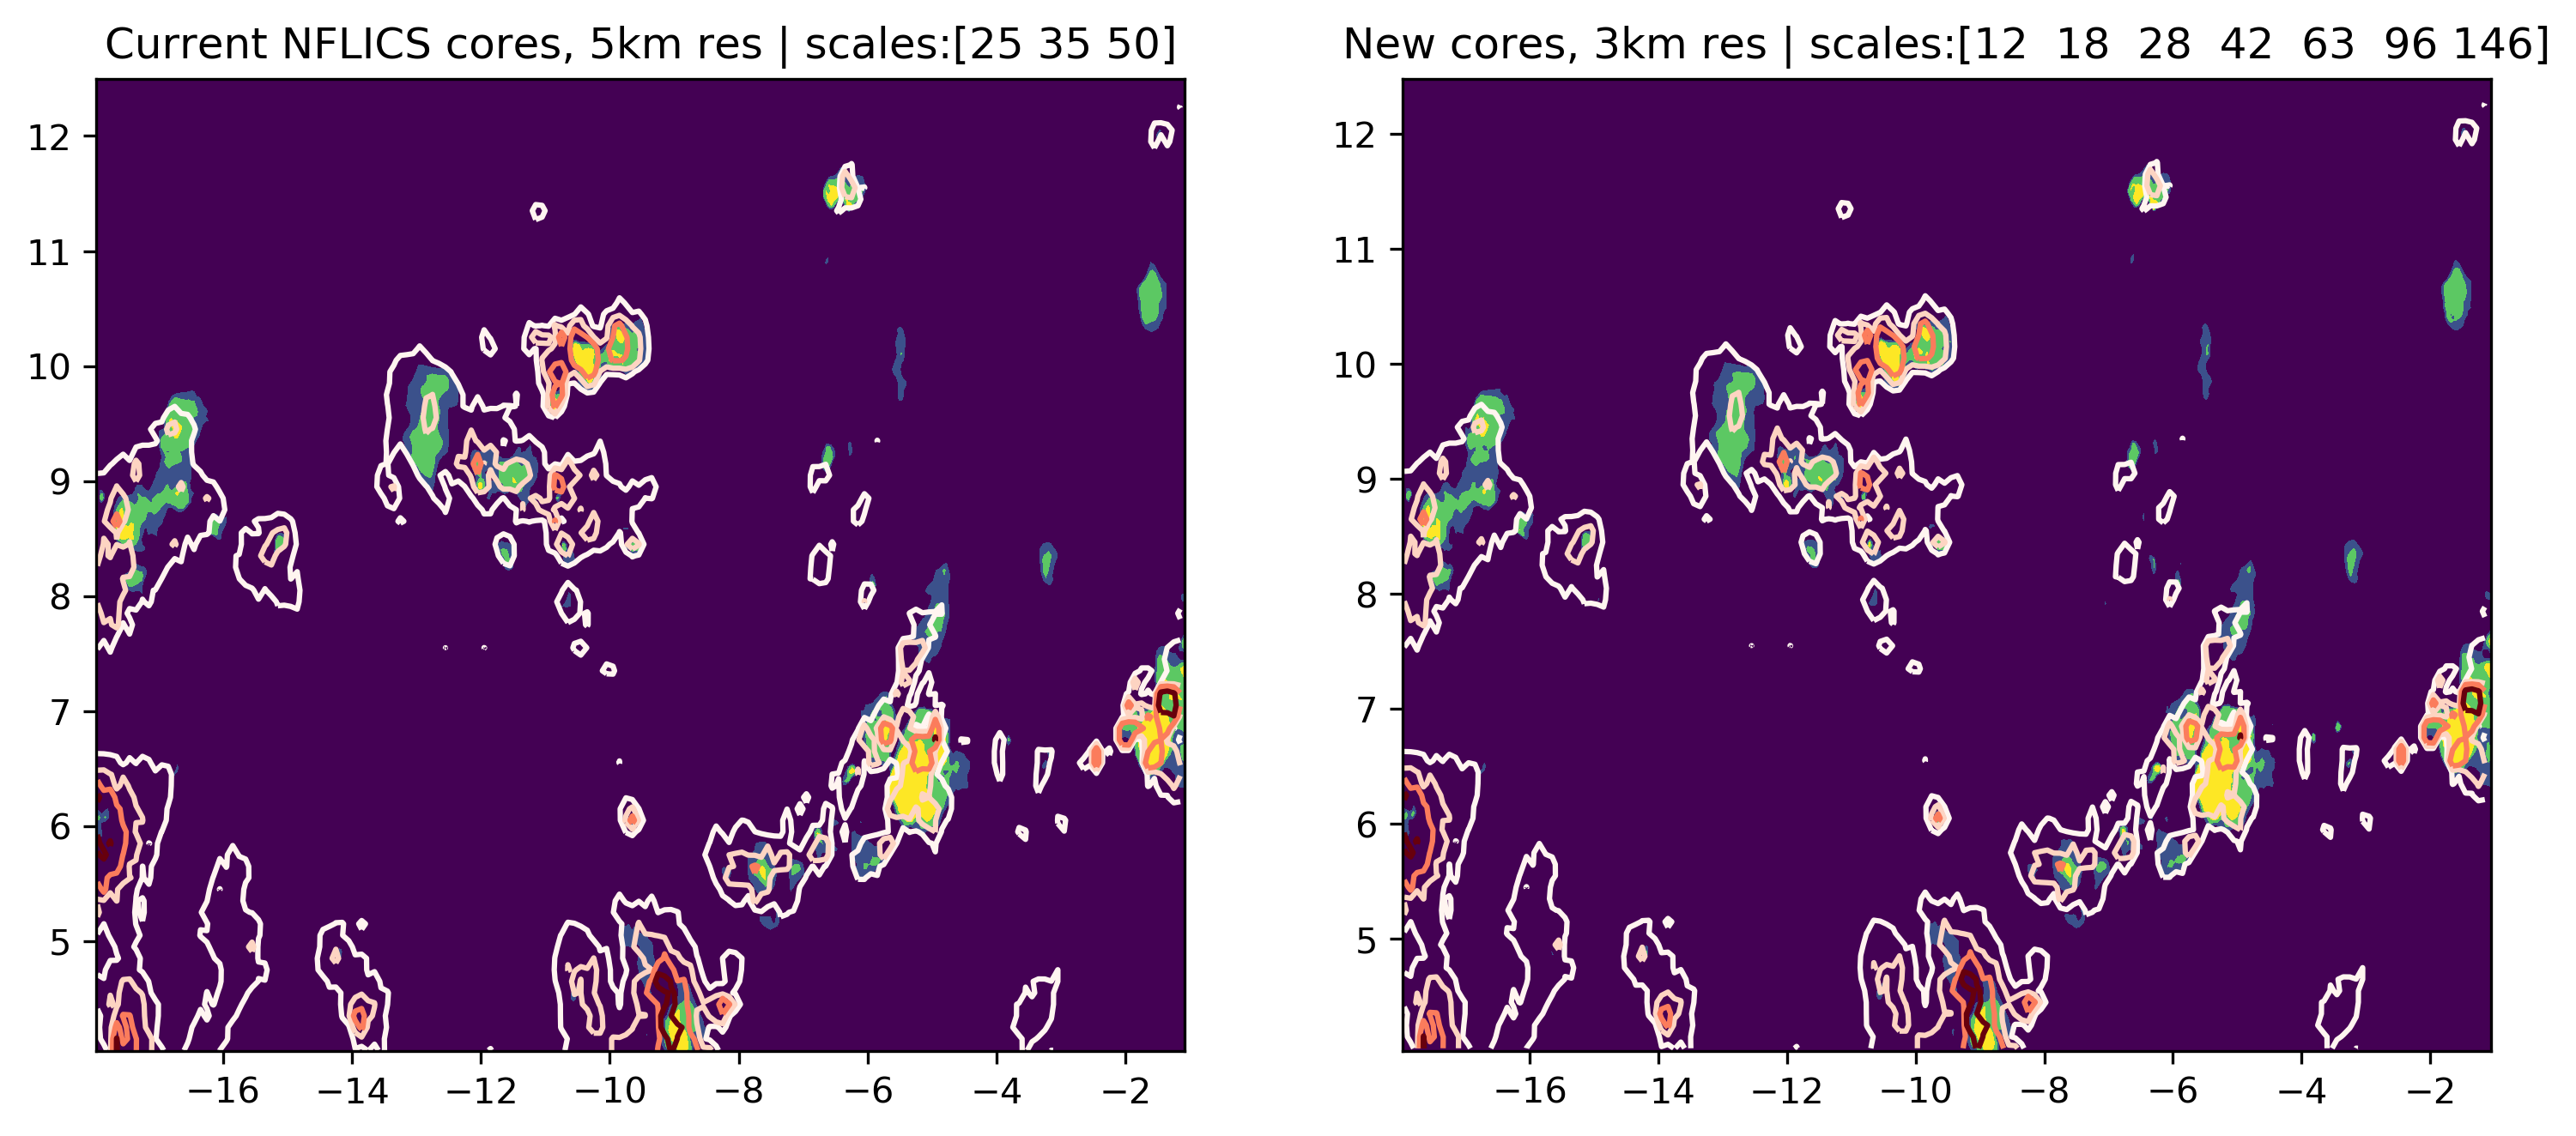

In [308]:
f = plt.figure(figsize=(12,5), dpi=300)
ax = f.add_subplot(121)
plt.contourf(nflics['lon'],nflics['lat'],nflics['tir']/100, levels=np.arange(-80,-65,5), extend='both', cmap='viridis_r')
plt.contour(pbox.lon, pbox.lat,pbox.T, cmap='Reds', levels=[2,5,10,20])
plt.title('Current NFLICS cores, 5km res | scales:[25 35 50]')

ax = f.add_subplot(122)
plt.contourf(tstep_old['lon'],tstep_old['lat'],tstep_old['BT']/100, levels=np.arange(-80,-65,5), extend='both', cmap='viridis_r')
plt.contour(pbox.lon, pbox.lat,pbox.T, cmap='Reds', levels=[2,5,10,20])
plt.title('New cores, 3km res | scales:[12  18  28  42  63  96 146]')
#f.savefig('/home/ck/DIR/cornkle/data/test/nflics_200906.jpg')